# TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset consists of over 10,000 rows of movie data, ranging from movie budgets, to revenue, to movie rating.

### Questions:
1. What years were the most successful in terms of revenue?
2. What movie genre has the highest average rating?
3. What directors had the highest average revenue?
4. What were the most successful movies, by revenue, popularity and rating?


In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
First I will load in the dataset and observe the first few rows and shape of the data to get a sense of what data I will be analyzing.

In [2]:
# Read in the dataset
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

The dataset contains 10,866 rows (or 10,866 movies) and 21 columns. The columns contain categorical (i.e. genre, director) and quantitative (i.e. budget, revenue) data.

### Data Cleaning
I will explore the dataset further to see if there is any cleaning that needs to be done to the data before performing any analysis. 

__**Summary:**__
1. Convert 'release_date' from a string to a datetime object.
2. Remove duplicate rows that may skew measures of center.
3. Split the 'cast', 'keywords', 'genres', and 'production_companies' columns by the '|' separator to convert row entries into lists. This will make iterating over these elements to perform calculations for individual cast members, genres, etc. rather than the entire contents of the cell.
4. Drop the 'id', 'imdb_id', 'homepage', 'tagline', 'overview', 'release_year' columns from the data set, to cut the dataframe to only the categorical and quantitative data I'll need for my analysis.
5. Drop the 'budget' and 'revenue' columns and rename the 'budget_adj' and 'revenue_adj' columns in order to analyze the most accurate, up-to-date data of budget and revenue for each film.
5. Drop null rows to ensure the highest fidelity of analysis.
6. Drop rows where budget or revenue are zero to avoid skews of the data. Rows where revenue and budget are zero are assumed to be errors.

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The "release_date" column has been read as a string and needs to be converted to datetime. The "release_year" column has been read in as an int and not a datetime object, however this should be fine for this analysis.

In [5]:
# Convert the date column to a datetime object
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

Next I'm going to check if there are any duplicate rows and remove them from the dataset.

In [6]:
# Count the number of duplicate rows
df.duplicated().sum()

1

In [7]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

In [8]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [9]:
df.keywords.head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

The "cast", "genres", "production_companies", and "keywords" columns all contain seperators within each row to denote multiple items. This could cause problems in my analysis when I want to perform calculations associated with individual cast members or genres, rather than all of them together within that row. To clean this, I will split those entities by the separator and put each element into a list within each row. This way I can iterate over each row with a loop to extract individual elements.

In [10]:
# Split the elements of each field where there are multiple items and place them into lists within each row
df['cast'] = df['cast'].str.split('|')
df['genres'] = df['genres'].str.split('|')
df['production_companies'] = df['production_companies'].str.split('|')
df['keywords'] = df['keywords'].str.split('|')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


There are a few columns I am not using for my analysis, so I will drop them from the dataset.

In [11]:
# Drop unneeded columns
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Next I will drop the 'revenue' and 'budget' columns and rename the 'revenue_adj' and 'budget_adj' columns in order to have the most up-to-date values for future calculations.

In [12]:
# Drop extra budget and revenue columns
df.drop(['revenue', 'budget'], axis=1, inplace=True)
df.head(1)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [13]:
# Rename the columns to remove 'adj', to make selecting them a bit easier
df.rename(columns={'budget_adj': 'budget', 'revenue_adj': 'revenue'}, inplace=True)
df.head(1)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


Now I will check for null values.

In [14]:
# Determine if there are null values in the dataset
df.isnull().sum().any()

True

There are null values in the dataset. Let's drill down further to see which columns contain the null values.

In [15]:
# Count how many null values there are of each field
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget                     0
revenue                    0
dtype: int64

It looks like the null values all occur in categorical fields. For the highest integrity of the analysis, I will drop the null values.

In [16]:
# Drop rows where there are null values
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

(8666, 14)

There are now 8,667 movies in this dataset. The last step is to describe the data to determine if there are any outliers that I may potentially need to remove.

In [17]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8.666000e+03,8.666000e+03
mean,0.741937,103.815140,264.204823,6.003612,2000.129818,2.130749e+07,6.362440e+07
std,1.087657,26.207186,635.195808,0.893539,13.221278,3.710269e+07,1.592874e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.249990,91.000000,20.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,0.449377,100.000000,54.000000,6.100000,2004.000000,2.130703e+06,1.891237e+05
75%,0.842984,113.000000,200.000000,6.600000,2011.000000,2.810466e+07,5.524857e+07
max,32.985763,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


Obseriving the range of the data, I see that the 'runtime', 'budget', and 'revenue' columns have minimum values of zero. Zeroes for these rows can be assumed to be errors and I will remove those rows to avoid skews of future calculations.

In [18]:
# Filter the data to include rows where runtime, revenue, and budget are not zero
cols = ['runtime', 'revenue', 'budget']
for c in cols:
    df = df[df[c] != 0]
    
df.reset_index(inplace=True, drop=True)
df.shape

(3677, 14)

The dataset now contains 3,677 movies.

<a id='eda'></a>
## Exploratory Data Analysis


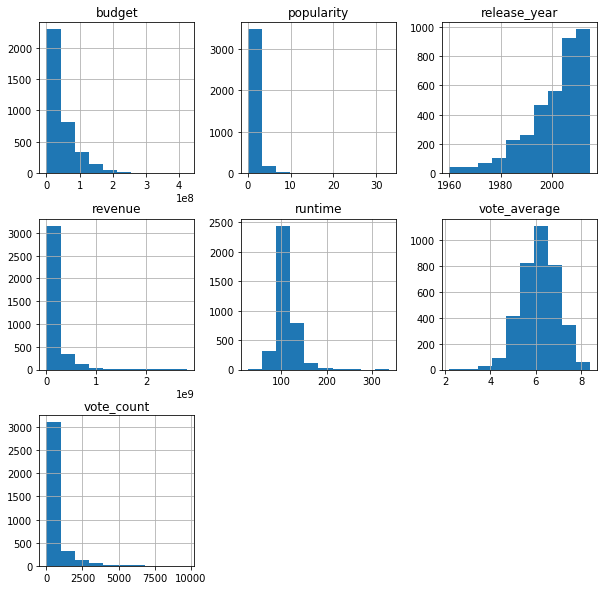

In [19]:
# Plot histograms of each quantitative field to determine shape of data
df.hist(figsize=(10,10));

__**Observations:**__

- Most of the elements of the dataset are skewed to the right, which makes sense because there are only a few blockbusters and major hits per year (not all movies are big budget successes). 
- The 'vote_average', or movie rating, is normally distributed, signifying that movie ratings didn't vary greatly. This is interesting, tying back to my question of ratings vs. popularity vs. budget, because this could mean that some higher budget films received subpar ratings.
- Budget and revenue are both skewed to the right, however the skew is greater for revenue. This shows me that there might have been more films that lost money than made money.
- Most of the movies in this dataset are modern (i.e. being released after 2000).

Now I'll move on to answer the questions I posed in the introduction.

### Q1: What years were the most successful in terms of revenue?

In [20]:
# Create a column to calculate the net revenue of each film
df['net_revenue'] = df['revenue'] - df['budget']
df.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,net_revenue
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [21]:
# Group the dataset by year and calculate the averages across quantitative fields.
yearly = df.groupby('release_year').mean()

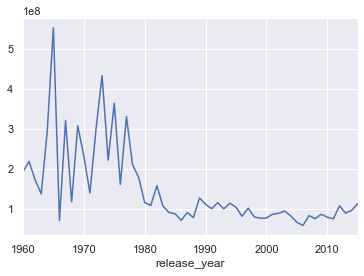

In [22]:
# Plot the average revenue as a line graph
sns.set()
yearly['net_revenue'].plot();

It looks like the older movies generated more revenue on average than newer movies. This may be because there were less movies available at one time during those years. I think the movie market may have become more saturated as time went on, bringing down the average revenue of movies per year.

In [23]:
# Use the count method on the grouped, yearly revenue data in order to plot the number of films released per year
yearly_count = df.groupby('release_year')['revenue'].count()
yearly_count

release_year
1960      4
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     16
1979     16
1980     23
1981     29
1982     26
1983     31
1984     41
1985     39
1986     47
1987     45
1988     55
1989     50
1990     52
1991     49
1992     52
1993     70
1994     61
1995     78
1996     82
1997     86
1998     89
1999    111
2000    100
2001    114
2002    120
2003    116
2004    139
2005    157
2006    163
2007    148
2008    153
2009    166
2010    167
2011    192
2012    146
2013    164
2014    159
2015    155
Name: revenue, dtype: int64

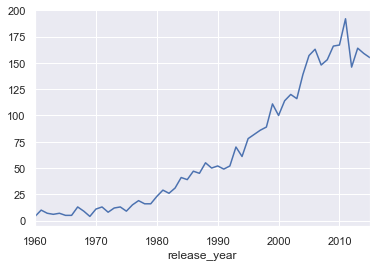

In [24]:
# Plot the counts
yearly_count.plot();

As I suspected, the number of films released per year climbed over the years, so this may have depressed the average revenue across all movies in a given year. I wonder how revenue looks in relation to budget for each year...

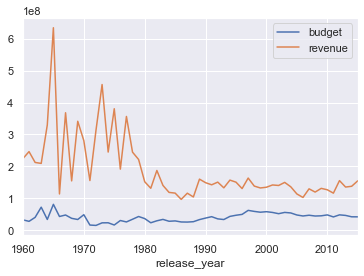

In [25]:
# Plot budget and revenue together
yearly['budget'].plot()
yearly['revenue'].plot()
plt.legend();

Observing the graph above it seems that the average budget of films within a given year is fairly flat, however the revenue was much greater between 1960 and 1980.

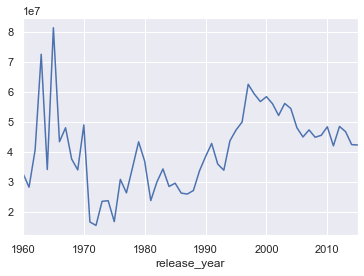

In [26]:
# Plot average yearly budget
yearly['budget'].plot();

It looks like 1960 to 1970 were pretty big years for movies, having a higher average budget than modern movies. However, the average yearly budget is significantly higher post 2000 than it was between 1970 and 2000.

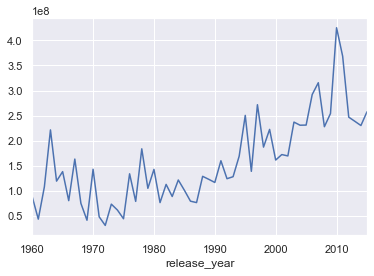

In [27]:
# Plot the maximum yearly film budgets
df.groupby('release_year')['budget'].max().plot();

Average film budgets were high, then decreased, then increased again after 2000. However, there has been a steady increase of the budget of each year's blockbuster film.

### Q2: What movie genre has the highest average rating?

Because I converted the 'genres' column components to lists within each row, I will split each genre into their own row in order to provide calculations for each genre.

In [28]:
# Split the elements of the 'genres' column into their own columns
split_genres = df.genres.apply(pd.Series).merge(df, left_index=True, right_index=True)

In [29]:
# Drop the original, combined 'genres' column
split_genres.drop(['genres'], axis=1, inplace=True)

In [30]:
# Use the .melt() method to give each genre it's own row
split_genres = split_genres.melt(id_vars=['popularity', 'original_title', 'cast', 'director', 'keywords', 'runtime', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget', 'revenue', 'net_revenue'], value_name='genre')

In [31]:
# Drop the null rows created
split_genres.dropna(inplace=True)

In [32]:
# Drop the variable column
split_genres.drop('variable', axis=1, inplace=True)
split_genres.shape

(9855, 15)

Now that every genre has been split out into it's own row, I can perform calculations as usual.

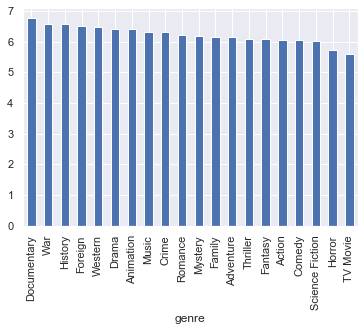

In [33]:
split_genres.groupby('genre')['vote_average'].mean().sort_values(ascending=False).plot(kind='bar');

That's interesting! The top three movie genres by average rating are Documentaries, War films, and History films.

### Q3: What directors had the highest average revenue?

In [34]:
# Group by 'director' and calculate average net revenue
directors = df.groupby('director')['net_revenue'].mean()

In [35]:
# Sort the dataframe by net revenue in descending order and return the top 10 directors
directors.sort_values(ascending=False, inplace=True)
directors.head(10)

director
Irwin Winkler                                        1.551568e+09
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    1.545635e+09
Richard Marquand                                     1.182995e+09
Roger Allers|Rob Minkoff                             1.093392e+09
Chris Buck|Jennifer Lee                              1.052306e+09
Kyle Balda|Pierre Coffin                             9.961120e+08
George Lucas                                         9.740265e+08
Andrew Stanton|Lee Unkrich                           9.134635e+08
Andrew Adamson|Kelly Asbury|Conrad Vernon            8.887368e+08
Lee Unkrich                                          8.631719e+08
Name: net_revenue, dtype: float64

Oops, it looks like there were some rows that had multiple directors...I am going to have to split this and iterate like I did with the 'genres' column.

In [36]:
# Split the elements of the column into lists by the '|' separator
df['director'] = df['director'].str.split('|')

In [37]:
# Split each list element into their own column
split_directors = df.director.apply(pd.Series).merge(df, left_index=True, right_index=True)

In [38]:
# Drop the original 'director' column
split_directors.drop(['director'], axis=1, inplace=True)
split_directors.head(1)

,0,1,2,3,4,5,6,7,8,9,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,net_revenue
0,Colin Trevorrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [39]:
# There were some columns cut off, so I will observe how many columns were created by the split
split_directors.columns

Index([                     0,                      1,                      2,
                            3,                      4,                      5,
                            6,                      7,                      8,
                            9,                     10,                     11,
                 'popularity',       'original_title',                 'cast',
                   'keywords',              'runtime',               'genres',
       'production_companies',         'release_date',           'vote_count',
               'vote_average',         'release_year',               'budget',
                    'revenue',          'net_revenue'],
      dtype='object')

In [40]:
# Use the .melt() method to unpivot the director columns into individual rows
split_directors = split_directors.melt(id_vars=['popularity', 'original_title', 'cast', 'keywords', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget', 'revenue', 'net_revenue'], value_name='director')

In [41]:
# Drop the null rows created
split_directors.dropna(inplace=True)

In [42]:
# Drop the variable column
split_directors.drop('variable', axis=1, inplace=True)
split_directors.shape

(3976, 15)

In [43]:
split_directors.head()

,popularity,original_title,cast,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,net_revenue,director
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Colin Trevorrow
1,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...","[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,George Miller
2,13.112507,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...","[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,Robert Schwentke
3,11.173104,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...","[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,J.J. Abrams
4,9.335014,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...","[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,James Wan


Now that the individual directors are separated, I can determine which directors had the highest average net revenue

In [44]:
group_directors = split_directors.groupby('director')['net_revenue'].mean()

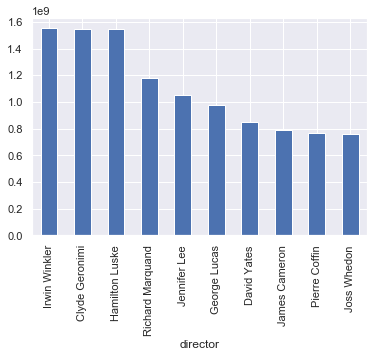

In [45]:
group_directors.sort_values(ascending=False, inplace=True)
group_directors.head(10).plot(kind='bar');

A couple of surprises here in this list of highest average revenue by director. I wonder which movies were the most successful for these directors?

### Q4: What were the most successful movies, by revenue, popularity and rating?

In [46]:
# Create pandas series using movie title and revenue
top_rev = df.groupby('original_title')['revenue'].mean()

In [47]:
# Sort the series in descending order by revenue
top_rev.sort_values(ascending=False, inplace=True)
top_rev.head()

original_title
Avatar          2.827124e+09
Star Wars       2.789712e+09
Titanic         2.506406e+09
The Exorcist    2.167325e+09
Jaws            1.907006e+09
Name: revenue, dtype: float64

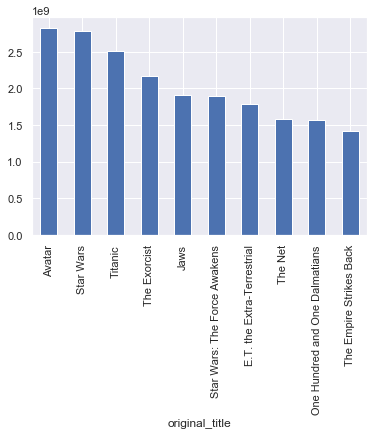

In [48]:
# Plot the top 10 movies
top_rev[:10].plot(kind='bar');

In [49]:
# Create pandas series using movie title and popularity
top_pop = df.groupby('original_title')['popularity'].mean()

In [50]:
# Sort the series in descending order by revenue
top_pop.sort_values(ascending=False, inplace=True)
top_pop.head()

original_title
Jurassic World             32.985763
Mad Max: Fury Road         28.419936
Interstellar               24.949134
Guardians of the Galaxy    14.311205
Insurgent                  13.112507
Name: popularity, dtype: float64

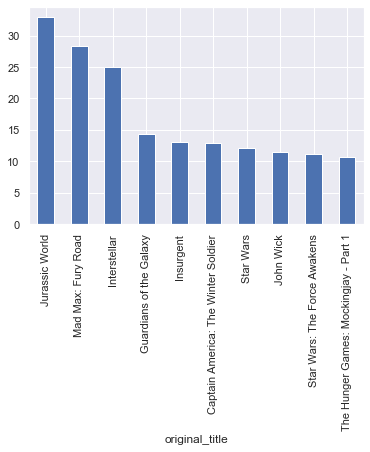

In [51]:
# Plot the top 10 movies
top_pop[:10].plot(kind='bar');

That's interesting, only 2 of the top 10 movies by popularity also were part of the top 10 movies to generate the highest revenue.

In [52]:
# Create pandas series using movie title and rating
top_rate = df.groupby('original_title')['vote_average'].mean()

In [53]:
# Sort the series in descending order by revenue
top_rate.sort_values(ascending=False, inplace=True)
top_rate.head()

original_title
The Shawshank Redemption    8.4
Stop Making Sense           8.4
The Godfather               8.3
Whiplash                    8.2
Forrest Gump                8.1
Name: vote_average, dtype: float64

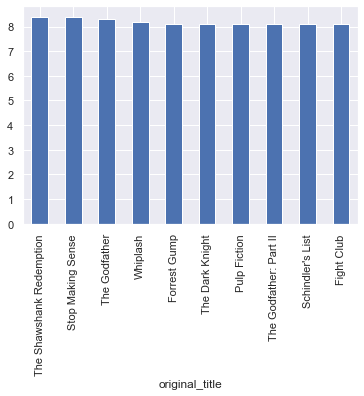

In [54]:
# Plot the top 10 movies
top_rate[:10].plot(kind='bar');

That's even more interesting! None of the top 10 movies by average voter rating were in either top 10 list by highest revenue or popularity. This shows me that the big budget, blockbuster films are not necessarily always the most highly revered. 

<a id='conclusions'></a>
## Conclusions
1. Movies between 1960 and 1980 had the highest average revenue per film. Average budgets per film were also higher/comparable to those of modern films. As the years passed, the number of movies released per year steadily increased, so it makes sense that high budget films between 1960 and 1980 made higher revenue due to less saturation in the market.<font color="33F9FF"> I would like to explore this further to statistically test this before I can make this conclusion within a certain level of confidence.</font>
2. The top three movie genres by average rating were documentaries, war movies, and history movies.<font color="33F9FF"> I wonder if these were prevalent during certain time periods?</font>
3. Irwin Winkler has the highest average net revenue of all directors in the dataset.<font color="33F9FF"> I would like to follow up on this analysis by seeing which movies he directed. Did any skew the average, or did he consistently direct high-revenue films?</font>
4. The top 10 movies by rating, revenue, and popularity are almost all completely different, aside from 2 of the Star Wars being some of the most popular as well as the highest revenue generating.<font color="33F9FF"> I'm curious as to why this is. I'd like to see movies that were very popular that had low average ratings and how much revenue they generated. Is it the norm for very highly rated movies to not gain much traction (popularity)?</font>